### NRL Large Dataset
### Classifiers: KNN, Logistics Regression, SVM
### June 2021

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
mat = scipy.io.loadmat('C:/Users/eacun/Downloads/dataset55_release2.mat')

In [2]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 22 14:13:11 2020'), ('__version__', '1.0'), ('__globals__', []), ('addedNoisePercent', array([[0.1],
       [0.5],
       [0. ],
       ...,
       [1. ],
       [0.1],
       [0. ]])), ('labels', array([[ 1],
       [ 1],
       [ 1],
       ...,
       [55],
       [55],
       [55]], dtype=uint8)), ('massLoadings', array([[90.48134734],
       [90.48134734],
       [90.48134734],
       ...,
       [93.56603952],
       [93.56603952],
       [93.56603952]])), ('spectra', array([[0.01684698, 0.01575019, 0.01553012, ..., 0.01631328, 0.01523777,
        0.01464116],
       [0.01862416, 0.01217942, 0.02092375, ..., 0.01522821, 0.02158774,
        0.01224737],
       [0.01634829, 0.01627708, 0.01620733, ..., 0.01681628, 0.01679286,
        0.0167685 ],
       ...,
       [0.01777366, 0.02470746, 0.04042846, ..., 0.52899222, 0.53342443,
        0.54125978],
       [0.03112273, 0.02996503, 0.03299245, 

In [3]:
mass=mat['massLoadings']
a=np.unique(mass)

In [4]:
y=mat['labels']

In [5]:
df=mat['spectra']
df=pd.DataFrame(df)
print(df.shape)

(49500, 1701)


In [6]:
ys=mat['substrateIDs']

In [7]:
subs=mat['substrateSpectra']
subs=pd.DataFrame(subs)
subs

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.008192,0.008116,0.008042,0.007970,0.007899,0.007830,0.007763,0.007697,0.007633,0.007570,...,0.010966,0.010943,0.010919,0.010895,0.010870,0.010845,0.010818,0.010792,0.010765,0.010737
1,0.035105,0.035617,0.036458,0.037003,0.037084,0.036102,0.035552,0.035033,0.034687,0.034424,...,0.040834,0.040778,0.040760,0.040794,0.040865,0.040946,0.041008,0.041036,0.041051,0.041070
2,0.585617,0.585672,0.585179,0.584104,0.585759,0.587581,0.588336,0.589407,0.590642,0.591676,...,0.559620,0.559569,0.559520,0.559472,0.559426,0.559382,0.559341,0.559301,0.559264,0.559230
3,0.026414,0.026214,0.026014,0.025770,0.025449,0.025250,0.025171,0.025119,0.025165,0.025351,...,0.546925,0.547225,0.547537,0.547909,0.548301,0.548652,0.548971,0.549233,0.549387,0.549484
4,0.011060,0.011381,0.011618,0.011406,0.010922,0.010713,0.010692,0.010628,0.010722,0.010908,...,0.023413,0.023356,0.023243,0.023115,0.023055,0.023158,0.023328,0.023359,0.023251,0.023180
5,0.064400,0.064528,0.064613,0.064131,0.063398,0.062792,0.062214,0.061542,0.060586,0.059307,...,0.277668,0.277010,0.276353,0.275671,0.274983,0.274299,0.273613,0.272943,0.272329,0.271673
6,0.035515,0.035251,0.034737,0.034093,0.033518,0.033043,0.032536,0.032043,0.031658,0.031341,...,0.253511,0.252787,0.252041,0.251235,0.250392,0.249560,0.248698,0.247776,0.246856,0.245963
7,0.031312,0.031438,0.031556,0.031777,0.031780,0.031608,0.031588,0.031441,0.031011,0.030551,...,0.569969,0.569996,0.570024,0.570030,0.570001,0.569943,0.569884,0.569884,0.569930,0.569966
8,0.000880,0.001132,0.004165,0.006112,0.005633,0.004667,0.003701,0.002964,0.002877,0.002152,...,0.010077,0.010496,0.010808,0.010552,0.010001,0.009687,0.009309,0.008746,0.008464,0.008364


### The whole data

In [8]:
dfset2=df.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfset2.head(105)

,0,1,2,3,4,5,6,7,8,9,...,1693,1694,1695,1696,1697,1698,1699,1700,Analyte,substrate
0,0.016847,0.015750,0.015530,0.014852,0.015202,0.015420,0.016572,0.014220,0.014954,0.014995,...,0.016104,0.017741,0.017533,0.016542,0.016122,0.016313,0.015238,0.014641,1,1
1,0.018624,0.012179,0.020924,0.003329,0.014498,0.019329,0.011184,0.010919,0.007558,0.017733,...,0.010701,0.018193,0.017089,0.018461,0.020192,0.015228,0.021588,0.012247,1,1
2,0.016348,0.016277,0.016207,0.016139,0.016066,0.015951,0.015780,0.015613,0.015557,0.015594,...,0.016926,0.016905,0.016884,0.016862,0.016839,0.016816,0.016793,0.016769,1,1
3,0.015725,0.018253,0.018749,0.017823,0.016850,0.015230,0.017195,0.011854,0.013581,0.011075,...,0.020200,0.018257,0.012629,0.014090,0.016704,0.016195,0.017715,0.011852,1,1
4,0.018868,0.024683,0.016563,0.020112,0.018959,0.017602,0.016099,0.009405,0.020006,0.019105,...,0.011581,0.019433,0.015924,0.006780,0.015658,0.017236,0.019725,0.015868,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.011894,0.029022,0.017123,0.008247,0.002930,-0.000288,0.013144,0.013240,0.011668,0.027900,...,0.010213,0.004414,0.017143,0.001922,0.007872,0.028227,0.014961,0.032057,2,1
101,0.024892,0.011826,0.011954,0.018210,0.004604,0.016785,-0.001717,0.001697,-0.008344,0.023831,...,0.008450,0.020094,0.026973,0.021135,0.017595,0.004410,0.019652,0.008473,2,1
102,0.022097,0.011850,0.007572,0.002714,0.013751,0.005509,0.012327,0.007745,0.007563,0.007562,...,0.009050,0.016961,0.016808,0.020410,0.011095,0.017465,0.017948,0.014691,2,1
103,0.011707,0.011613,0.011517,0.011409,0.011346,0.011279,0.011208,0.011128,0.011051,0.010978,...,0.013918,0.013883,0.013844,0.013806,0.013771,0.013744,0.013718,0.013689,2,1


### Extracting the substrates

In [9]:
#hard=[30,40,55]
#dfset5=dfset2[-dfset2["Analyte"].isin(hard)]
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]
#dfset1=pd.DataFrame(dfset1)
df['Analyte']=y
df['substrate']=ys
df.iloc[20000:20006,:]
#yt=dfset5["Analyte"]
dfsub1.head()
#dfset5.shape

,0,1,2,3,4,5,6,7,8,9,...,1693,1694,1695,1696,1697,1698,1699,1700,Analyte,substrate
0,0.016847,0.015750,0.015530,0.014852,0.015202,0.015420,0.016572,0.014220,0.014954,0.014995,...,0.016104,0.017741,0.017533,0.016542,0.016122,0.016313,0.015238,0.014641,1,1
1,0.018624,0.012179,0.020924,0.003329,0.014498,0.019329,0.011184,0.010919,0.007558,0.017733,...,0.010701,0.018193,0.017089,0.018461,0.020192,0.015228,0.021588,0.012247,1,1
2,0.016348,0.016277,0.016207,0.016139,0.016066,0.015951,0.015780,0.015613,0.015557,0.015594,...,0.016926,0.016905,0.016884,0.016862,0.016839,0.016816,0.016793,0.016769,1,1
3,0.015725,0.018253,0.018749,0.017823,0.016850,0.015230,0.017195,0.011854,0.013581,0.011075,...,0.020200,0.018257,0.012629,0.014090,0.016704,0.016195,0.017715,0.011852,1,1
4,0.018868,0.024683,0.016563,0.020112,0.018959,0.017602,0.016099,0.009405,0.020006,0.019105,...,0.011581,0.019433,0.015924,0.006780,0.015658,0.017236,0.019725,0.015868,1,1


In [10]:
#dfset5.tail()

### Substrate's effect correction

In [11]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

### Extracting the signatures

In [12]:
s1=subs.loc[0,:]
s2=subs.loc[1,:]
s3=subs.loc[2,:]
s4=subs.loc[3,:]
s5=subs.loc[4,:]
s6=subs.loc[5,:]
s7=subs.loc[6,:]
s8=subs.loc[7,:]
s9=subs.loc[8,:]

In [13]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(s1))/np.sum(np.array(s1)*np.array(s1)))*s1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(s2))/np.sum(np.array(s2)*np.array(s2)))*s2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(s3))/np.sum(np.array(s3)*np.array(s3)))*s3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(s4))/np.sum(np.array(s4)*np.array(s4)))*s4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(s5))/np.sum(np.array(s5)*np.array(s5)))*s5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(s6))/np.sum(np.array(s6)*np.array(s6)))*s6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(s7))/np.sum(np.array(s7)*np.array(s7)))*s7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(s8))/np.sum(np.array(s8)*np.array(s8)))*s8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(s9))/np.sum(np.array(s9)*np.array(s9)))*s9,axis=1)

In [14]:
#subdft=[modsub1t,modsub2t,modsub3t,modsub4t,modsub5t,modsub6t,modsub7t,modsub8t,modsub9t]
#centt_subs=pd.concat(subdft)
#centt_subs.head()

In [15]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.003352,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003437,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.002536,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888


In [16]:
cent_subs['substrate']=ys
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1692,1693,1694,1695,1696,1697,1698,1699,1700,substrate
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034,1
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237,1
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209,1
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282,1
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888,1


In [17]:
# Using sklearn
from sklearn.preprocessing import normalize
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.003352,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003437,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.002536,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888


In [18]:
#bt=centt_subs.iloc[:,0:1701]
#bt.head()

In [19]:
#normalize(b)
#b1t=bt.apply(lambda x: x/(x**2).sum()**.5, axis=1)
#b1t.shape

In [20]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.009607,0.004595,0.004153,0.001293,0.003809,0.005611,0.012284,0.000603,0.005059,0.005881,...,-0.017547,-0.025276,-0.020442,-0.011642,-0.012491,-0.017440,-0.019376,-0.018127,-0.023498,-0.026352
1,0.013683,-0.009277,0.023046,-0.040534,0.000598,0.018640,-0.010568,-0.011098,-0.022913,0.014546,...,-0.038060,0.017181,-0.033179,-0.005745,-0.009596,-0.004439,0.002042,-0.015857,0.007474,-0.026345
2,0.005920,0.006296,0.006659,0.007008,0.007325,0.007399,0.007152,0.006912,0.007250,0.008074,...,-0.018391,-0.018267,-0.018138,-0.018009,-0.017876,-0.017742,-0.017598,-0.017460,-0.017316,-0.017168
3,0.001720,0.014365,0.017369,0.013624,0.009649,0.002587,0.012490,-0.012215,-0.003470,-0.014777,...,-0.012008,-0.034912,-0.001307,-0.010292,-0.036719,-0.029583,-0.016964,-0.019143,-0.011705,-0.039219
4,0.014017,0.036012,0.006521,0.020120,0.016342,0.011801,0.006702,-0.017573,0.022017,0.019119,...,-0.012055,0.004192,-0.031434,-0.002269,-0.015060,-0.048664,-0.015689,-0.009685,-0.000306,-0.014363


In [21]:
#b1t['substrate']=dfset5["substrate"]
#b1t.head()

In [22]:
b1['substrate']=ys
b1.tail()

,0,1,2,3,4,5,6,7,8,9,...,1692,1693,1694,1695,1696,1697,1698,1699,1700,substrate
43995,0.022945,0.030391,-0.021061,0.000595,0.018469,0.013449,-0.022171,0.054699,-0.013509,0.018002,...,-0.012890,0.024393,0.003340,0.004712,-0.026322,0.024897,0.019834,0.003619,-0.009022,8
43996,0.035904,0.010592,-0.023353,-0.059501,-0.015678,-0.000103,-0.000592,-0.032401,0.007539,0.016579,...,0.012039,0.005271,-0.037496,-0.029304,-0.012021,0.004537,-0.020122,-0.008952,-0.032809,8
43997,0.012271,0.008601,0.012912,-0.024950,-0.018514,-0.012157,0.002842,0.008810,-0.008781,0.022915,...,-0.030961,-0.034714,-0.021741,-0.001467,0.007648,-0.008405,0.001770,-0.010442,-0.039539,8
43998,-0.013672,-0.007898,-0.010769,-0.018724,-0.002720,-0.020688,-0.019782,0.015293,0.039859,0.024351,...,0.009579,0.002649,-0.025854,-0.051293,0.006571,0.008780,-0.000369,-0.005349,-0.007159,8
43999,0.023768,0.044580,-0.006637,-0.023797,-0.036522,0.026488,-0.002815,0.004729,0.023445,-0.021209,...,0.025938,0.015724,-0.010907,-0.039846,0.012378,0.009469,-0.053052,0.002889,-0.013490,8


### KNN

In [23]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
#print(len(y))

In [24]:
#import xgboost as xgb
#import time
#from sklearn.model_selection import train_test_split
#X=b1.iloc[:,0:1701]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
#start_time = time.time()
#model = xgb.XGBClassifier(
#    #gamma=1,                 
#    learning_rate=0.01,
#    max_depth=5,
#    n_estimators=50,                                                                    
#    subsample=0.8,
#    random_state=34
#) 
#
#model.fit(X_train, y_train)
#predictions = model.predict(X_test)
#print("The accuracy is=",model.score(X_test,y_test))
#print("--- %s seconds ---" % (time.time() - start_time))


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# We will find by inspection the best k according to the classifier accuracy on the test set
accuracies = []
kVals = range(1, 20, 2)
X=b1.iloc[:,0:1701]
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
for k in range(1, 20, 2):
    # Entrenar el clasificador  con el valor actual de  `k`
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = neigh.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=85.48%
k=3, accuracy=86.16%
k=5, accuracy=86.74%
k=7, accuracy=86.85%
k=9, accuracy=86.93%
k=11, accuracy=86.94%
k=13, accuracy=86.96%
k=15, accuracy=86.91%
k=17, accuracy=86.76%
k=19, accuracy=86.51%


In [26]:
# Hallando el k para el cual la precision es mayor
i = np.argmax(accuracies)
print("k=%d gave the best accuracy %.2f%%" % (kVals[i],
    accuracies[i] * 100))

k=13 gave the best accuracy 86.96%


In [27]:
#metrics for k=13
import time
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
neigh = KNeighborsClassifier(n_neighbors=kVals[i])
X=b1.iloc[:,0:1701]
neigh.fit(X, y) 
print("Accuracy estimated by resubstitution", neigh.score(X,y))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=kVals[i])
neigh.fit(X_train, y_train) 
#Calculating  metrics of prediction
predictions = neigh.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
prob2=pd.DataFrame(neigh.predict_proba(X_test))
a=prob2.max(axis=1)
print('Probability of classification',(a[a>.80].shape[0])/prob2.shape[0])
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))

Accuracy estimated by resubstitution 0.8798585858585859
--- 23.715266466140747 seconds ---
Probability of classification 0.8536363636363636
F1-score is= 0.8693683076286729
The accuracy is= 0.8695959595959596


In [28]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       0.78      0.87      0.83       179
           2       0.77      0.85      0.81       172
           3       0.85      0.90      0.87       194
           4       0.82      0.86      0.84       174
           5       0.78      0.92      0.84       183
           6       0.83      0.88      0.86       189
           7       0.84      0.88      0.86       172
           8       0.89      0.88      0.89       196
           9       0.88      0.93      0.90       174
          10       0.82      0.90      0.85       163
          11       0.85      0.89      0.87       185
          12       0.88      0.86      0.87       183
          13       0.90      0.87      0.89       185
          14       0.86      0.85      0.86       193
          15       0.89      0.84      0.86       183
          16       0.86      0.85      0.86       194
          17       0.82      0.89      0.86       158


In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Binarize the output
y1=label_binarize(y,classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,\
                            29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55])
n_classes = y1.shape[1]

In [30]:
# Learn to predict each class against the other
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=0)
start_time = time.time()
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=kVals[i]))   
y_score = classifier.fit(X_train, y_train).predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1191.2541179656982 seconds ---


In [31]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

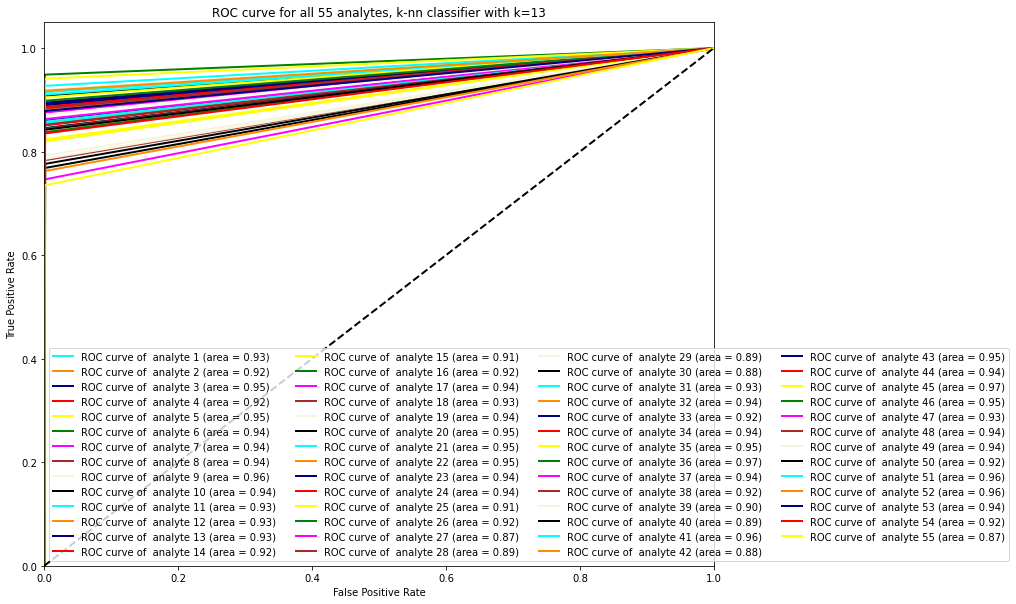

In [32]:
# First aggregate all false positive rates
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Plot all ROC curves
plt.figure(figsize=[12,10])
lw=2
colors = cycle(['cyan', 'darkorange', 'navy','red','yellow','green','magenta','brown','beige','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of  analyte {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all 55 analytes, k-nn classifier with k=13')
plt.legend(loc="best",ncol=4)
plt.show()

### Using the 40  analytes as testing 

In [33]:
yfortest=pd.read_csv("c:/Users/eacun/NRL/newy.csv",header=None)
Xfortest=pd.read_csv("c:/Users/eacun/NRL/newdata.csv",header=None)
Xfortest.shape
yfortest=yfortest.astype(int)
Xfortest["Analyte"]=yfortest
Xfortest.head()

,0,1,2,3,4,5,6,7,8,9,...,1692,1693,1694,1695,1696,1697,1698,1699,1700,Analyte
0,0.006593,0.007476,0.006800,0.010072,0.010446,0.010157,0.013928,0.014528,0.013623,0.017932,...,-0.007268,-0.006155,-0.012700,-0.008968,-0.002538,-0.003519,-0.004037,-0.008019,-0.006984,30
1,-0.016333,0.011538,0.001048,-0.000179,-0.000770,-0.001737,0.007633,0.009170,0.002870,0.011766,...,-0.005718,-0.015373,-0.005127,-0.011386,-0.009255,-0.001060,-0.001612,-0.016363,-0.002559,20
2,-0.005348,0.036134,0.030431,0.011412,0.007818,0.013162,-0.032478,0.008999,0.008123,0.009853,...,-0.038647,-0.039608,-0.013988,0.020456,0.010057,0.000856,0.038902,0.035069,0.016243,39
3,0.004714,0.005182,0.005515,0.005790,0.006058,0.006349,0.006700,0.007108,0.007465,0.007738,...,-0.016340,-0.016247,-0.016168,-0.016075,-0.015967,-0.015840,-0.015707,-0.015558,-0.015445,6
4,-0.003245,0.000118,0.003326,0.006083,0.004984,0.005934,0.000673,0.003487,0.005428,0.005932,...,-0.019043,-0.015090,-0.016453,-0.014209,-0.016319,-0.013047,-0.016972,-0.014881,-0.016518,6


In [34]:
lista=[1,2,4,5,8,12]
smalltest=Xfortest[Xfortest["Analyte"].isin(lista)]
smalltest["Analyte"].replace({1: 45, 2: 32, 4: 33, 5: 34, 8: 35, 12: 39}, inplace=True)
A=smalltest.iloc[:,0:1701]
B=smalltest.iloc[:,1701:1702]
A.shape

(2700, 1701)

In [35]:
B.shape

(2700, 1)

In [36]:
C=B.to_numpy()
#print(type(C))

In [37]:
print("The accuracy is=",neigh.score(A,C))

The accuracy is= 0.5711111111111111


In [39]:
from sklearn.decomposition import PCA
dfset3=b1.copy()
pca = PCA(n_components=100)
pca_result = pca.fit_transform(dfset3)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y, test_size=0.2,random_state=0)
start_time = time.time()
#Calculating  metrics of prediction
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(Xc_train, yc_train) 
predictions = neigh.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",neigh.score(Xc_test,yc_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.7769079317992841
precision= 0.7862484910540809
The accuracy is= 0.7742424242424243
--- 15.537241458892822 seconds ---


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
import time
X=b1.iloc[:,0:1701]
#model.fit(X,y)
#model.score(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(X_train,y_train)
print("Training %s seconds ---" % (time.time() - start_time))
start_time = time.time()
#Calculating  metrics of prediction
print("The accuracy is=",model.score(X_test,y_test))
print("Testing: %s seconds ---" % (time.time() - start_time))
predictions = model.predict(X_test)
#print(predictions)
prob3=pd.DataFrame(model.predict_proba(X_test))
a=prob3.max(axis=1)
print('Probability of classification',(a[a>.50].shape[0])/prob2.shape[0])
#print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
#print("precision=",precision_score(y_test,predictions,average="weighted"))

Training 150.39631605148315 seconds ---
The accuracy is= 0.8316161616161616
Testing: 0.11195778846740723 seconds ---
Probability of classification 0.5668686868686869


In [ ]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

In [ ]:
dfset3=b1.copy()
pca = PCA(n_components=100)
pca_result = pca.fit_transform(dfset3)
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(pca_result,y)
print("Accuracy estimated by resubstitution", model.score(pca_result, y))
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y, test_size=0.2,random_state=0)
start_time = time.time()
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(Xc_train,yc_train)
predictions = model.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",model.score(Xc_test,yc_test))
print("--- %s seconds ---" % (time.time() - start_time))

### SVM

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import time
#y=dfsub1['Analyte']
#print(y.value_counts())
X=b1.iloc[:,0:1701]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
#clf=svm.svmSVC(max_iter=2000)
start_time = time.time()
clf=svm.SVC()
clf.fit(X_train, y_train) 
print("Training: %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print("The accuracy is=",clf.score(X_test,y_test))
print("Testing %s seconds ---" % (time.time() - start_time))
predictions = clf.predict(X_test)
#prob4=pd.DataFrame(clf.predict_proba(X_test))
#a=prob4.max(axis=1)
#print('Probability of classification',(a[a>.50].shape[0])/prob2.shape[0])
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))

Training: 1285.391283750534 seconds ---
The accuracy is= 0.7877777777777778
--- 321.6291124820709 seconds ---
F1-score is= 0.8222695694464816
precision= 0.8858585887784225


In [ ]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

In [ ]:
dfset3=b1.copy()
pca = PCA(n_components=100)
pca_result = pca.fit_transform(dfset3)
pca_result.shape

In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
scaler.fit(Xc_train)
Xc_train= scaler.transform(Xc_train)
Xc_test = scaler.transform(Xc_test)
start_time = time.time()
clf=svm.SVC()
clf.fit(Xc_train,yc_train)
predictions = clf.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",clf.score(Xc_test,yc_test))
print("--- %s seconds ---" % (time.time() - start_time))

### Saving PCA por CNN-LSTM

In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y,test_size=0.2,random_state=0)
Xc_train=pd.DataFrame(Xc_train)
Xc_test=pd.DataFrame(Xc_test)
Xc_train.to_csv("c:/Users/eacun/NRL/NRLDataset/train/Subs/X_train.csv",index=False,header=False)
Xc_test.to_csv("c:/Users/eacun/NRL/NRLDataset/test/Subs/X_test.csv",index=False,header=False)

In [ ]:
np.savetxt('c:/Users/eacun/NRL/NRLDataset/train/y_train.csv', yc_train) 
np.savetxt('c:/Users/eacun/NRL/NRLDataset/test/y_test.csv', yc_test) 